# Linear SVM

[The Support Vector Machine SVM](https://link.springer.com/content/pdf/10.1007%2FBF00994018.pdf) is a linear classifier that finds the **maximum margin separating hyperplane**. In other words, **SVM find the separating hyperplane that maximizes the distance to the closest data points from both classes.**

In [5]:
#@title Import libraries {display-mode: "form"}

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [6]:
#@title Helper functions {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

# Helper functions
def draw_grid(x_lim=np.array([-4, 4]), y_lim=np.array([-4, 4])):
    """Draw an empty grid"""
    ax = plt.gca()
    # Draw ticks and grid
    for i in range(int(x_lim.min()), int(x_lim.max())):
        ax.axvline(i, linestyle='--', color='#ecf0f1', zorder=0)
        ax.plot([i, i], [0.05, -0.05], color='#2c3e50')
    for i in range(int(y_lim.min()), int(y_lim.max())):
        ax.axhline(i, linestyle='--', color='#ecf0f1', zorder=0)
        ax.plot([0.05, -0.05], [i, i], color='#2c3e50')
    # x and y axis
    ax.axhline(0, color='#2c3e50', zorder=0)
    ax.axvline(0, color='#2c3e50', zorder=0)
    ax.scatter([0], [0], color='#c0392b', zorder=0)

    ax.grid(False)
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)

def draw_vectors(vectors, origin='origin', cmap=None, labels=None):
    if cmap:
        colors = cmap
    else:
        colors = ['#3498db', '#e67e22', '#f1c40f', '#2ecc71', '#1abc9c']

    if origin == 'origin':
        x_0 = np.zeros(len(vectors))
        y_0 = np.zeros(len(vectors))
    else:
        x_0, y_0 = origin[:, 0], origin[:, 1]
    ax = plt.gca()
    if labels:
        for i in range(len(vectors)):
            ax.text(vectors[i][0]+0.1, vectors[i][1]+0.2, labels[i],
                    {'color': 'black', 'fontsize': 14, 'ha': 'center', 'va': 'center',
                    'bbox': dict(boxstyle="round", fc="white", alpha=0)})
    ax.quiver(x_0, y_0, vectors[:, 0], vectors[:, 1],
              angles='xy', scale_units='xy', scale=1, color=colors)

def projection(x, y, draw_vector=True):
    color = '#95a5a6'
    ax = plt.gca()
    dot_product = np.dot(x, y)
    y_norm = y / np.dot(y, y)
    x_projection = y_norm * dot_product
    ax.plot((x[0], x_projection[0]), (x[1], x_projection[1]), linestyle='--', linewidth=3, c=color)
    if draw_vector:
        draw_vectors(np.array([x_projection]), cmap=['#bdc3c7'])

def determinant_area(i_hat, j_hat):
    ax = plt.gca()
    sum_vector = i_hat + j_hat
    polygon = plt.Polygon([(0, 0), i_hat, sum_vector, j_hat], fill=True, color='#f39c12', alpha=0.3)
    print('Determinant Area:', np.abs(i_hat[0]*j_hat[1] - i_hat[1]*j_hat[0]))
    ax.add_line(polygon)
    
def projection_onto_H(x, w, b):
    ax = plt.gca()
    alpha = (np.dot(x, w) + b) / np.dot(w, w)
    d = alpha * w
    x_projection = x - d
    ax.plot((x[0], x_projection[0]), (x[1], x_projection[1]), linestyle='--', linewidth=3, c='#95a5a6')
    
def plot_margins(X, y, w, b):
    ax = plt.gca()
    gamma = np.abs(np.dot(X, w) + b) / np.sqrt(np.dot(w, w))
    x_pos = X[y==1][np.argmin(gamma[y == 1])]
    x_neg = X[y==0][np.argmin(gamma[y == 0])]
    d_pos = gamma[y==1][np.argmin(gamma[y == 1])]
    d_neg = gamma[y==0][np.argmin(gamma[y == 0])]
    
    ax.scatter([x_pos[0], x_neg[0]],[x_pos[1], x_neg[1]], s=150, linewidth=2, facecolor='none', edgecolors='#2c3e50')
    projection_onto_H(x_pos, w, b)
    projection_onto_H(x_neg, w, b)
    ax.set_title(f'Margin Class +1: {d_pos:.3f}, Class -1: {d_neg:.3f}', fontsize=24)
    
def plot_svc(model, plot_support=True):
    ax = plt.gca()
    xlim = ax.get_xlim() 
    ylim = ax.get_ylim() 
    
    # create grid (coordinate system - x and y) to evaluate model
    x = np.linspace(xlim[0], xlim[1], 40)
    y = np.linspace(ylim[0], ylim[1], 40) 
    X, Y = np.meshgrid(x, y)
    flatten_X = X.ravel() 
    flatten_Y = Y.ravel()
    xy = np.vstack([flatten_X, flatten_Y]).T 
    Z = model.decision_function(xy).reshape(X.shape)

    # Plot decision boundary and margins.
    ax.contour(X, Y, Z, colors='k', # draw filled contours
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    
    # plot circle around the support vectors returned by fitted SVC model
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], 
                   model.support_vectors_[:, 1],
                   s=150, linewidth=2, facecolors='none', edgecolors='k')
        
def plot_hyperplane(w, b):
    ax = plt.gca()
    draw_vectors(np.array([w]), origin=np.array([[(-b/w[0]), 0]]))
    x_1 = np.linspace(-8, 8, 100)
    ax.plot(x_1, (-w[0]/w[1])*x_1 + (-b/w[1]))

In [7]:
# w = np.array([-1, 1])
# b = -6

# Logistic Regression result
w = np.array([-1.6088516, 0.26800105])
b = -3.52428733

# Scale invariance
# w = 3*w
# b = 3*b

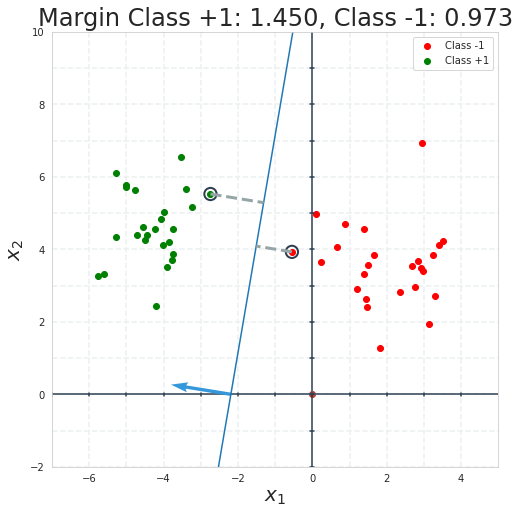

In [8]:
#@title Hyperplane with margins {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

# Hyperplane example
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, n_features=2, centers=2, random_state=102, cluster_std=1.)

plt.figure(figsize=(8, 8))
draw_grid(x_lim=np.array([-7, 5]), y_lim=np.array([-2, 10]))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='r', label='Class -1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='g', label='Class +1')

plot_hyperplane(w, b)
plot_margins(X, y, w, b)

plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.legend()
plt.show()

In [ ]:
w = np.array([-0.68003743,  0.31998662])
b = -2.63130338

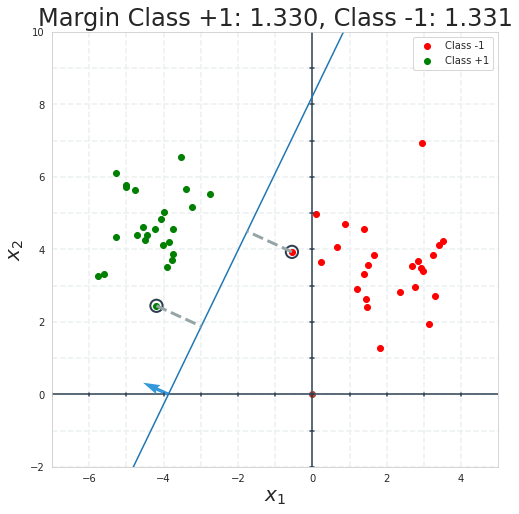

In [ ]:
#@title Hyperplane with margins {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

# Hyperplane example
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, n_features=2, centers=2, random_state=102, cluster_std=1.)

plt.figure(figsize=(8, 8))
draw_grid(x_lim=np.array([-7, 5]), y_lim=np.array([-2, 10]))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='r', label='Class -1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='g', label='Class +1')

plot_hyperplane(w, b)
plot_margins(X, y, w, b)

plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.legend()
plt.show()

## Max Margin Classifier

A hyperplane is defined through $\mathbf{w}$ and $b$ as a set of point such that $\mathcal{H}=\left\{\mathbf{x}\vert{}\mathbf{w}^T\mathbf{x}+b=0\right\}$. Then the margin $\gamma$ is the distance from the hyperplane to the closest point across both classes.

### Hard-margin

Assumption: the training data is **linearly separable**. The objective is to **maximize the margin** under the contraints that **all data points must lie on the correct side of the hyperplane**

### The support vectors

For the optimal $\mathbf{w},b$, some training points **x** will have tight contraints:

$$
y^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)}+b) = 1.
$$

These training points **x** are called **support vectors**. Support vectors define the maximum margin of the hyperplane to the dataset and they therefore determine the shape of the hyperplane.

In [9]:
X, y = make_blobs(n_samples=50, n_features=2, centers=2, random_state=102, cluster_std=1.)


In [11]:
from sklearn.svm import SVC # support vector classifier

clf = SVC(kernel='linear',C=10)

clf.fit(X, y)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

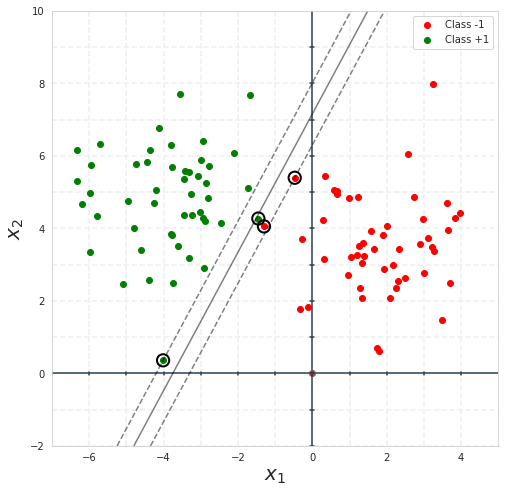

In [12]:
plt.figure(figsize=(8, 8))
draw_grid(x_lim=np.array([-7, 5]), y_lim=np.array([-2, 10]))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='r', label='Class -1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='g', label='Class +1')

plot_svc(clf)
# plot_hyperplane(w, b)

plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.legend()
plt.show()

In [ ]:
clf.support_vectors_

array([[-0.54918117,  3.93052908],
       [-4.19055029,  2.44213142],
       [-2.73938571,  5.52730861]])

In [ ]:
clf.coef_ # w

array([[-0.68003743,  0.31998662]])

In [ ]:
clf.intercept_ # b

array([-2.63130338])

In [ ]:
# wx + b
print(np.dot(clf.coef_,clf.support_vectors_[0]) + clf.intercept_) # wx + b
# print(clf.decision_function([clf.support_vectors_[1]]))

[-1.00012294]


In [ ]:
print(np.dot(clf.coef_,clf.support_vectors_[1]) + clf.intercept_)

[0.99987701]


In [ ]:
print(np.dot(clf.coef_,clf.support_vectors_[2]) + clf.intercept_)

[1.0002462]


However, hard-margin SVM tends to be too sensitive to certain new data point

In [ ]:
X, y = make_blobs(n_samples=50, n_features=2, centers=2, random_state=102, cluster_std=1.)
X = np.append(X,np.array([[-4.,2.]]),axis=0)
y = np.append(y,0)

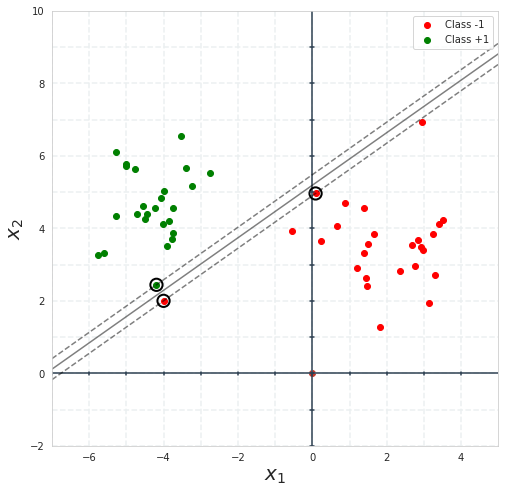

In [ ]:
clf = SVC(kernel='linear',C=10)

clf.fit(X, y)

plt.figure(figsize=(8, 8))
draw_grid(x_lim=np.array([-7, 5]), y_lim=np.array([-2, 10]))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='r', label='Class -1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='g', label='Class +1')

plot_svc(clf)

plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.legend()
plt.show()

A single example should not affect your hyperplane significantly. What is this called?

## Soft-margin

If there is no separating hyperplane between the two classes, then there is no solution for the optimization problem stated above. To fix it we introduce the hinge loss function:

$$
\min_{\mathbf{w},b}\underbrace{\mathbf{w}^T\mathbf{w}}_{l_{2}-regularizer} + C\  \sum_{i=1}^{m}\underbrace{\max\left [ 1-y^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)}+b),0 \right ]}_{hinge-loss}        
$$

Note that $y^{(i)}$ is the i-th target, which is 1 or -1.

The function $\max\left [ 1-y^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)}+b),0 \right ]$ is zero if $x^{(i)}$ lies on the correct side of the hyperplane, as $y^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)}+b)$ > 1

For data points on the wrong side of the hyperplane, the function's value is proportional to the distance from the hyperplane.

We use C (hyperparameter) to allow points within our margins ('on the street')
- Higher C = strong penalty. The more points we allow on the street, the bigger the hinge loss will become. When C is big enough, no point is even allowed within our margins. This is hard margin, and this can lead to overfitting
- Lower C = weak penalty. More points are allowed within the margins


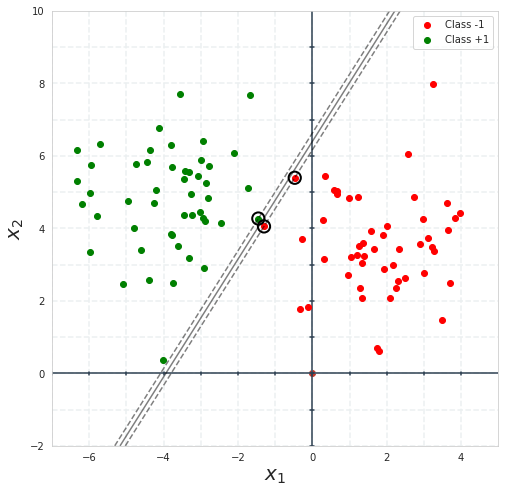

In [15]:
# Generate the training dataset
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=102, cluster_std=1.3)

plt.figure(figsize=(8, 8))

draw_grid(x_lim=np.array([-7, 5]), y_lim=np.array([-2, 10]))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='r', label='Class -1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='g', label='Class +1')

# Train and plot SVM model
clf = SVC(kernel='linear', C=1e5)
clf.fit(X, y)
plot_svc(clf)

plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.legend()
plt.show()

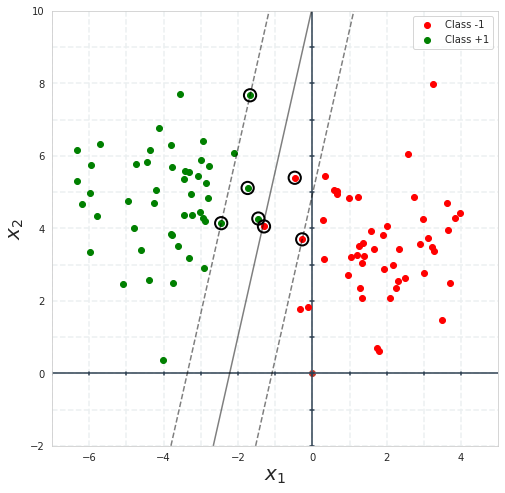

In [18]:
# Generate the training dataset
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=102, cluster_std=1.3)
# X = np.append(X,np.array([[-3.,4.]]),axis=0)
# y = np.append(y,0)

plt.figure(figsize=(8, 8))

draw_grid(x_lim=np.array([-7, 5]), y_lim=np.array([-2, 10]))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='r', label='Class -1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='g', label='Class +1')

# Train and plot SVM model
clf = SVC(kernel='linear', C=0.5)
clf.fit(X, y)
plot_svc(clf)

plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.legend()
plt.show()